To indicate the strength of the association between two nominal variables, Cramér's V (Cramér, 1946) is often used.

As for the interpretation for Cramér's V various rules of thumb exist but one of them is from Cohen who let's the interpretation depend on the degrees of freedom, shown in the table below.

|df*|negligible|small|medium|large|
|-------|---|---|---|---|
|1|0 < .10|.10 < .30|.30 < .50|.50 or more|
|2|0 < .07|.07 < .21|.21 < .35|.35 or more|
|3|0 < .06|.06 < .17|.17 < .29|.29 or more|
|4|0 < .05|.05 < .15|.15 < .25|.25 or more|
|5|0 < .05|.05 < .13|.13 < .22|.22 or more|
                                 

The degrees of freedom (df*) is for Cramér's V the minimum of the number of rows, or number of columns, then minus one.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Get the data file from here : [Telco-Customer-churn.csv](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)

In [3]:
master_df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [4]:
df = master_df.copy()

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Pearson correlation will just show the correlation output for numerical features
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


### Checking for "Contract"  with "Churn"

In [8]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

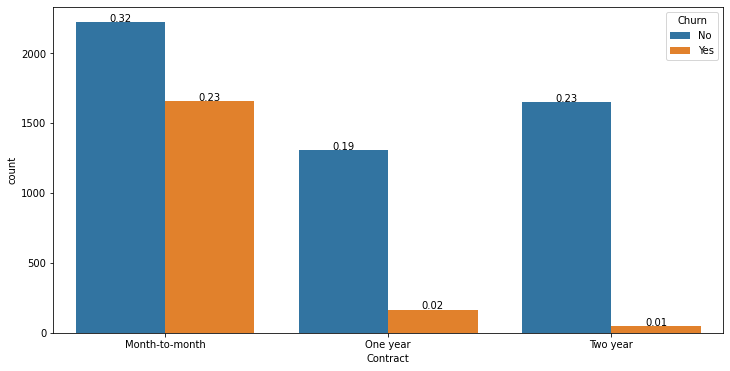

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='Contract', hue='Churn', data=df)

# showing the proportion of data 
for p in ax.patches:
    height = p.get_height() # getting the count
    ax.text(p.get_x() + p.get_width()/2,
            height+5,
            '{:1.2f}'.format(height/df.shape[0]),
            ha='center')    

**Observation:**
- There seems to be significant relationship between the two categorical variables 'Contract' and 'Churn'

**We will try to prove this relationship with statistical test:**
- **Chi-square statistics**
    > X^2 = sum((Observed-Expected)^2/Expected)
    
    This will show the significance of the relationship but it will not show the strenght of the relationship
- **Cramer's V test**
    > V = sqrt(chi2/(n*(min(C,R)-1)))
    
    This will show you the strength of the relationship. Value will be between 0 and 1.

`In order to perform Chi-square test we need to create a contingency table.`

`Contingency table shows the frequency (Observed values) for each categories of one categorical features w.r.t each category of another categorical variable.`

`Expected value for a cell = (Row count for that cell * Column count for that cell)/Total`

In [10]:
# Visulaizing the contingency table with margins (column/row wise totals)
pd.crosstab(index=df['Contract'], columns=df['Churn'], margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [11]:
# creating contingency table without margins
contract_churn_ct = pd.crosstab(index=df['Contract'], columns=df['Churn'])

In [12]:
contract_churn_ct

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [13]:
contract_churn_ct.iloc[0].values

array([2220, 1655], dtype=int64)

In [14]:
# Now we will calculate the chi-square statistics

from scipy import stats

In [15]:
chi_2, p_value, dof, _ = stats.chi2_contingency([contract_churn_ct.iloc[0].values,
                                                contract_churn_ct.iloc[1].values,
                                                contract_churn_ct.iloc[2].values])

In [16]:
print("Chi_2: ", chi_2)
print("p-value: ", p_value)
print("Degrees of Freedom: ", dof)

Chi_2:  1184.5965720837926
p-value:  5.863038300673391e-258
Degrees of Freedom:  2


`p-value is used to determine relationship between the two categorical variable is significant or not.
If the p-value is less than 0.05, this means there is a significant relationship between the given two categorical features.`

* Here, p value is almost 0 and chi_2 value is very high.

* So, higher the chi_2 value is more possibility of relationship.

**Now in order to find the strength of relationship we will perform Cramer's V test**

> V = sqrt(chi2/(n*(min(C,R)-1)))

In [17]:
import numpy as np

In [18]:
np.sqrt(chi_2/(df.shape[0] * (min(contract_churn_ct.shape[0], contract_churn_ct.shape[1]) - 1)))

0.4101156965761409


|df*|negligible|small|medium|large|
|-------|---|---|---|---|
|1|0 < .10|.10 < .30|.30 < .50|.50 or more|
|2|0 < .07|.07 < .21|.21 < .35|.35 or more|
|3|0 < .06|.06 < .17|.17 < .29|.29 or more|
|4|0 < .05|.05 < .15|.15 < .25|.25 or more|
|5|0 < .05|.05 < .13|.13 < .22|.22 or more|

**Based on table above for dof = 2, V=0.41 shows pretty significant relationship**

### Checking for "PaperlessBilling"  with "Churn"

In [19]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

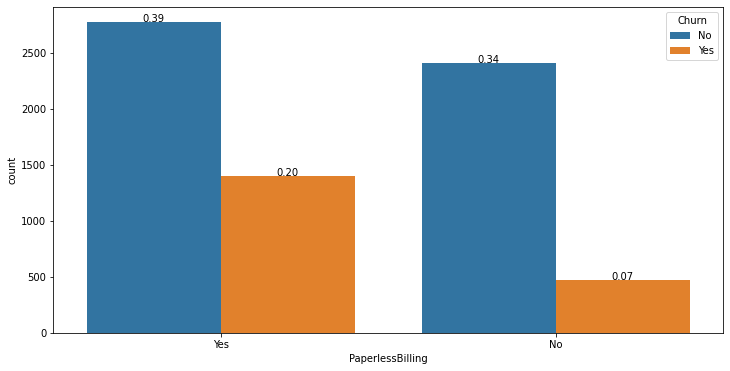

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=df)

# showing the proportion of data 
for p in ax.patches:
    height = p.get_height() # getting the count
    ax.text(p.get_x() + p.get_width()/2,
            height+5,
            '{:1.2f}'.format(height/df.shape[0]),
            ha='center')    

In [21]:
# creating contingency table without margins
plb_churn_ct = pd.crosstab(index=df['PaperlessBilling'], columns=df['Churn'])

plb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [22]:
chi_2, p_value, dof, _ = stats.chi2_contingency([plb_churn_ct.iloc[0].values,
                                                plb_churn_ct.iloc[1].values])

In [23]:
print("Chi_2: ", chi_2)
print("p-value: ", p_value)
print("Degrees of Freedom: ", dof)

Chi_2:  258.27764906707307
p-value:  4.073354668665985e-58
Degrees of Freedom:  1


In [24]:
V = np.sqrt(chi_2/(df.shape[0] * (min(contract_churn_ct.shape[0], contract_churn_ct.shape[1]) - 1)))
V

0.19149814355338285


|df*|negligible|small|medium|large|
|-------|---|---|---|---|
|1|0 < .10|.10 < .30|.30 < .50|.50 or more|
|2|0 < .07|.07 < .21|.21 < .35|.35 or more|
|3|0 < .06|.06 < .17|.17 < .29|.29 or more|
|4|0 < .05|.05 < .15|.15 < .25|.25 or more|
|5|0 < .05|.05 < .13|.13 < .22|.22 or more|

**Based on table above for dof = 1, V=0.19 shows small relationship**